# About Dataset
Dataset Overview

This dataset contains sensor data collected from various machines, with the aim of predicting machine failures in advance. It includes a variety of sensor readings as well as the recorded machine failures.

Columns Description:

`footfall`: The number of people or objects passing by the machine.

`tempMode`: The temperature mode or setting of the machine.

`AQ`: Air quality index near the machine.

`USS`: Ultrasonic sensor data, indicating proximity measurements.

`CS`: Current sensor readings, indicating the electrical current usage of the machine.

`VOC`: Volatile organic compounds level detected near the machine.

`RP`: Rotational position or RPM (revolutions per minute) of the machine parts.

`IP`: Input pressure to the machine.

`Temperature`: The operating temperature of the machine.

`fail`: Binary indicator of machine failure (1 for failure, 0 for no failure).

In [1]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv('./data/machine_failure/data.csv')

In [8]:
df.head()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   footfall     944 non-null    int64
 1   tempMode     944 non-null    int64
 2   AQ           944 non-null    int64
 3   USS          944 non-null    int64
 4   CS           944 non-null    int64
 5   VOC          944 non-null    int64
 6   RP           944 non-null    int64
 7   IP           944 non-null    int64
 8   Temperature  944 non-null    int64
 9   fail         944 non-null    int64
dtypes: int64(10)
memory usage: 73.9 KB


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
def plot_distributions(df, bins):
    num_cols = len(df.columns)
    rows = (num_cols // 3) + (1 if num_cols % 3 != 0 else 0)
    
    fig, axes = plt.subplots(rows, 3, figsize=(15, rows * 2))
    axes = axes.flatten()
    
    for i, col in enumerate(df.columns):
        sns.histplot(df[col], bins=bins, ax=axes[i])
        axes[i].set_xlabel('')
        axes[i].set_ylabel(col)
        axes[i].set_title(f'Distribution of {col}')
    
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

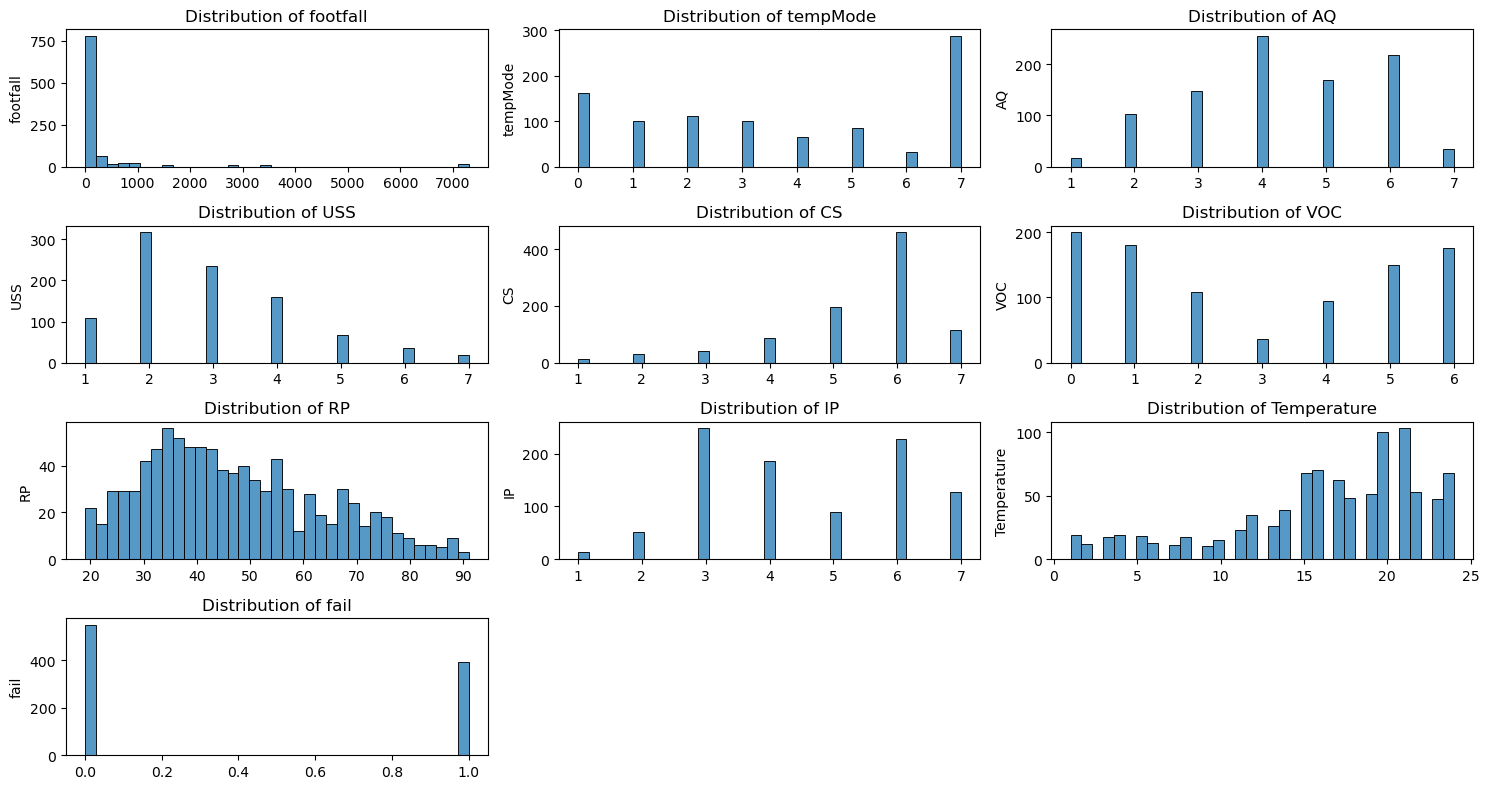

In [34]:
plot_distributions(df,35)

In [38]:
X = df.copy()
y = X.pop('fail')

In [40]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

scaler = MinMaxScaler()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y)

In [47]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

In [51]:
X_train_scaled.head(2)

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature
0,0.026027,0.285714,0.333333,0.333333,0.833333,0.000000,0.222222,0.833333,0.956522
1,0.007260,0.000000,0.333333,0.833333,0.500000,0.166667,0.250000,0.666667,0.782609


In [53]:
X_test_scaled.head(2)

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature
0,0.008493,0.571429,1.000000,0.166667,0.833333,1.000000,0.236111,0.666667,0.869565
1,0.003973,0.571429,0.333333,0.500000,0.833333,0.333333,0.250000,0.666667,0.608696


In [57]:
X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape

((755, 9), (189, 9), (755,), (189,))

In [86]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

result = pd.DataFrame(columns=['Model','Accuracy','Precision','Recall','F1-score'])

In [63]:
def get_metrics(y_test,y_pred):
    
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    
    print(f'Accuracy: {accuracy:.3f}')
    print(f'Precision: {precision:.3f}')
    print(f'Recall: {recall:.3f}')
    print(f'F1-score: {f1:.3f}')
    
    return accuracy, precision, recall, f1

In [88]:
from sklearn.linear_model import LogisticRegression

model = 'LogReg'

model_log = LogisticRegression()
model_log.fit(X_train_scaled, y_train)
y_pred = model_log.predict(X_test_scaled)

accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
result = pd.concat([result, pd.DataFrame({'Model': [model], 'Accuracy': [accuracy], 
                                          'Precision': [precision], 'Recall': [recall], 
                                          'F1-score': [f1]})])

Accuracy: 0.862
Precision: 0.798
Recall: 0.899
F1-score: 0.845


In [90]:
from sklearn.tree import DecisionTreeClassifier

model = 'DecTree'

model_tree = DecisionTreeClassifier()
model_tree.fit(X_train_scaled,y_train)
y_pred = model_tree.predict(X_test_scaled)

accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
result = pd.concat([result, pd.DataFrame({'Model': [model], 'Accuracy': [accuracy], 
                                          'Precision': [precision], 'Recall': [recall], 
                                          'F1-score': [f1]})])

Accuracy: 0.857
Precision: 0.817
Recall: 0.848
F1-score: 0.832


In [94]:
from sklearn.ensemble import RandomForestClassifier

model = 'RandForest'

model_forest = RandomForestClassifier(random_state=42)
model_forest.fit(X_train_scaled, y_train)
y_pred = model_forest.predict(X_test_scaled)

accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
result = pd.concat([result, pd.DataFrame({'Model': [model], 'Accuracy': [accuracy], 
                                          'Precision': [precision], 'Recall': [recall], 
                                          'F1-score': [f1]})])

Accuracy: 0.873
Precision: 0.824
Recall: 0.886
F1-score: 0.854


In [96]:
import xgboost as xgb

model = 'XGBoost'

model_xgb = xgb.XGBClassifier()
model_xgb.fit(X_train_scaled,y_train)
y_pred = model_xgb.predict(X_test_scaled)

accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
result = pd.concat([result, pd.DataFrame({'Model': [model], 'Accuracy': [accuracy], 
                                          'Precision': [precision], 'Recall': [recall], 
                                          'F1-score': [f1]})])

Accuracy: 0.873
Precision: 0.831
Recall: 0.873
F1-score: 0.852


In [99]:
from sklearn.model_selection import RandomizedSearchCV

In [101]:
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 5, 7, 9, 11],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'min_child_weight': [1, 3, 5, 7]
}

In [104]:
random_search = RandomizedSearchCV(estimator=model_xgb, param_distributions=param_grid, 
                                   n_iter=50, scoring='accuracy', cv=3, verbose=2, random_state=42, n_jobs=-1)

In [106]:
random_search.fit(X_train_scaled, y_train)

best_model_xgb = random_search.best_estimator_
best_params = random_search.best_params_

Fitting 3 folds for each of 50 candidates, totalling 150 fits


In [109]:
best_model_xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [111]:
model = 'XGBoost_fined'

best_model_xgb.fit(X_train_scaled,y_train)
y_pred = best_model_xgb.predict(X_test_scaled)

accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
result = pd.concat([result, pd.DataFrame({'Model': [model], 'Accuracy': [accuracy], 
                                          'Precision': [precision], 'Recall': [recall], 
                                          'F1-score': [f1]})])

Accuracy: 0.857
Precision: 0.795
Recall: 0.886
F1-score: 0.838


In [115]:
result.set_index('Model',inplace=True)

In [157]:
result.reset_index(inplace=True)

In [159]:
from sklearn.ensemble import GradientBoostingClassifier

model = 'GradBoost'

model_GBoost = GradientBoostingClassifier(random_state=42)
model_GBoost.fit(X_train_scaled, y_train)
y_pred = model_GBoost.predict(X_test_scaled)

accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
result = pd.concat([result, pd.DataFrame({'Model': [model], 'Accuracy': [accuracy], 
                                          'Precision': [precision], 'Recall': [recall], 
                                          'F1-score': [f1]})])

Accuracy: 0.873
Precision: 0.831
Recall: 0.873
F1-score: 0.852


In [161]:
result

,Model,Accuracy,Precision,Recall,F1-score
0,LogReg,0.862434,0.797753,0.898734,0.845238
1,DecTree,0.857143,0.817073,0.848101,0.832298
2,RandForest,0.873016,0.823529,0.886076,0.853659
3,XGBoost,0.873016,0.831325,0.873418,0.851852
4,XGBoost_fined,0.857143,0.795455,0.886076,0.838323
0,GradBoost,0.873016,0.831325,0.873418,0.851852


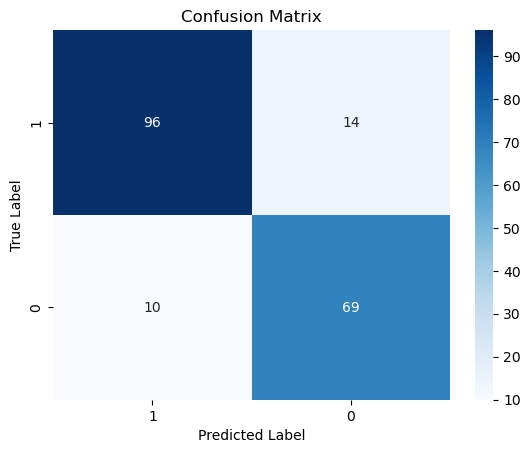

In [163]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
plt.Figure(figsize=(14,5))
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', xticklabels=y.unique(), yticklabels=y.unique())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [183]:
import keras
from keras.models import Sequential
from keras import layers
from keras.callbacks import EarlyStopping

In [254]:
early_stop = EarlyStopping(monitor='val_accuracy',patience=10)

In [314]:
model_NN_1 = Sequential([
    
    layers.Dense(256, activation='relu', input_shape=(9,)),
    # layers.BatchNormalization(),
    # layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
    
])

model_NN_1.compile(optimizer='adam', metrics=['accuracy'], loss='binary_crossentropy')
history = model_NN_1.fit(X_train_scaled, y_train, batch_size=64, epochs=100, 
                         validation_split=0.25, verbose=1, 
                         callbacks=early_stop
                        )

Epoch 1/100
9/9 [==============================] - 4s 73ms/step - loss: 0.6481 - accuracy: 0.6078 - val_loss: 0.6541 - val_accuracy: 0.8571
Epoch 2/100
9/9 [==============================] - 0s 17ms/step - loss: 0.4434 - accuracy: 0.8587 - val_loss: 0.5959 - val_accuracy: 0.9471
Epoch 3/100
9/9 [==============================] - 0s 18ms/step - loss: 0.3309 - accuracy: 0.8922 - val_loss: 0.5359 - val_accuracy: 0.9524
Epoch 4/100
9/9 [==============================] - 0s 18ms/step - loss: 0.2679 - accuracy: 0.9187 - val_loss: 0.4941 - val_accuracy: 0.9259
Epoch 5/100
9/9 [==============================] - 0s 17ms/step - loss: 0.2465 - accuracy: 0.9134 - val_loss: 0.4634 - val_accuracy: 0.9471
Epoch 6/100
9/9 [==============================] - 0s 18ms/step - loss: 0.2262 - accuracy: 0.9117 - val_loss: 0.4362 - val_accuracy: 0.9471
Epoch 7/100
9/9 [==============================] - 0s 17ms/step - loss: 0.2187 - accuracy: 0.9240 - val_loss: 0.4356 - val_accuracy: 0.9206
Epoch 8/100
9/9 [===

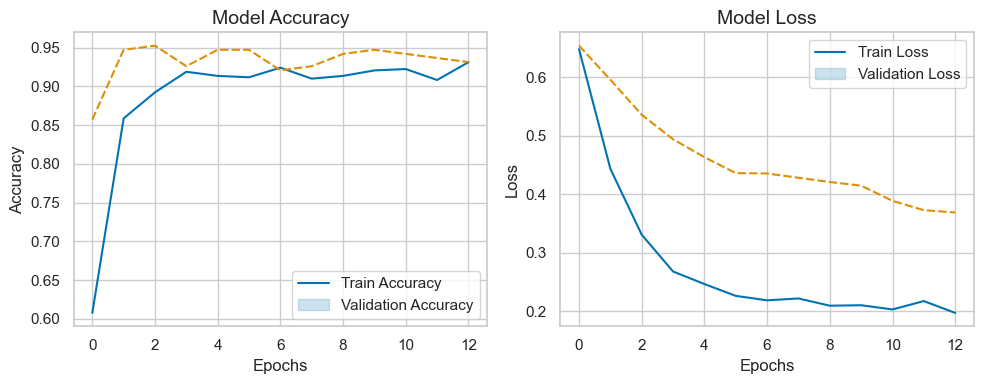

6/6 [==============================] - 0s 5ms/step - loss: 0.4266 - accuracy: 0.8889
Test accuracy: 0.8888888955116272


In [316]:
history_df = pd.DataFrame(history.history)

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax = ax.flatten()

color_palette = sns.color_palette("colorblind", n_colors=2)
sns.set(style="whitegrid")

sns.lineplot(data=history_df[['accuracy', 'val_accuracy']], ax=ax[0], palette=color_palette)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(['Train Accuracy', 'Validation Accuracy'], loc='lower right')
ax[0].set_title("Model Accuracy", fontsize=14)

sns.lineplot(data=history_df[['loss', 'val_loss']], ax=ax[1], palette=color_palette)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(['Train Loss', 'Validation Loss'], loc='upper right')
ax[1].set_title("Model Loss", fontsize=14)

plt.tight_layout()
plt.show()

test_loss, test_acc = model_NN_1.evaluate(X_test_scaled,y_test)
print('Test accuracy:', test_acc)

In [448]:
model = 'NN'

y_pred = model_NN_1.predict(X_test_scaled)

accuracy, precision, recall, f1 = get_metrics(y_test, y_pred.round(0))
result = pd.concat([result, pd.DataFrame({'Model': [model], 'Accuracy': [accuracy], 
                                          'Precision': [precision], 'Recall': [recall], 
                                          'F1-score': [f1]})])

6/6 [==============================] - 0s 3ms/step
Accuracy: 0.889
Precision: 0.872
Recall: 0.861
F1-score: 0.866


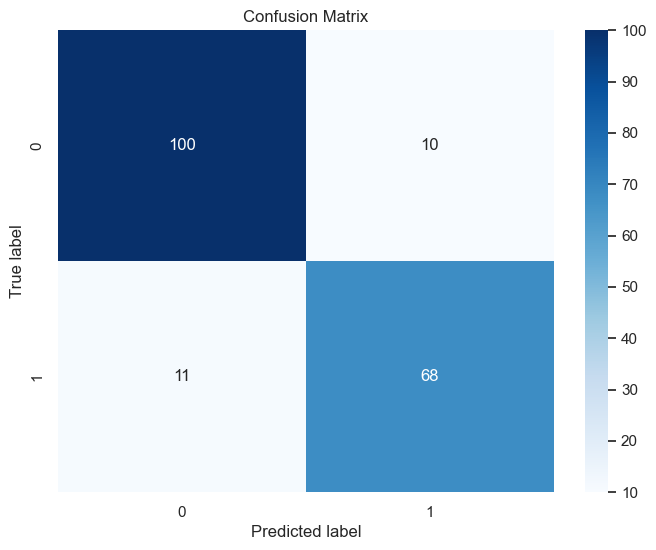

In [450]:
conf_matrix = confusion_matrix(y_test, y_pred.round(0))

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

In [452]:
result

,Model,Accuracy,Precision,Recall,F1-score
0,LogReg,0.862434,0.797753,0.898734,0.845238
1,DecTree,0.857143,0.817073,0.848101,0.832298
2,RandForest,0.873016,0.823529,0.886076,0.853659
3,XGBoost,0.873016,0.831325,0.873418,0.851852
4,XGBoost_fined,0.857143,0.795455,0.886076,0.838323
0,GradBoost,0.873016,0.831325,0.873418,0.851852
0,NN,0.888889,0.871795,0.860759,0.866242


In [494]:
def plot_metrics_bars(df):
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
    
    fig, axes = plt.subplots(1, len(metrics), figsize=(20, 5))
    
    for i, metric in enumerate(metrics):
        sns.barplot(x='Model', y=metric, data=df.sort_values(by='Accuracy'), ax=axes[i],hue='Model',legend=False,palette='Set2')
        axes[i].set_title(f'{metric} Comparison') 
        axes[i].set_ylim(0.75, 0.9)
        axes[i].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

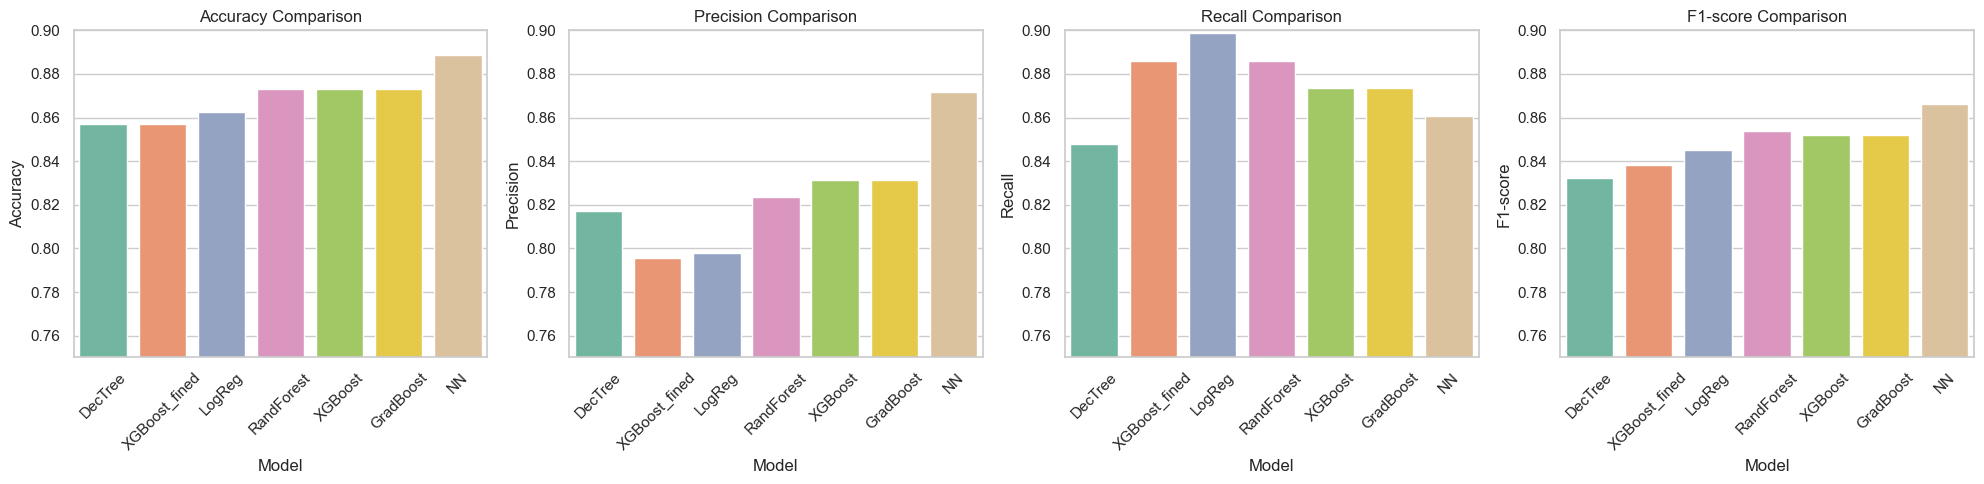

In [496]:
plot_metrics_bars(result)